# **PREPROCESSING**

In [40]:
#Removing warnngs
import warnings
warnings.filterwarnings('ignore')

**1. Importing essential libraries**
---

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**2. Loading dataset**
---

In [42]:
from sklearn.datasets import fetch_openml
california = fetch_openml(name="california_housing", version=1, as_frame=True)
df = california.frame

**3. Basic Info**
---

In [43]:
print(california.DESCR)

Median house prices for California districts derived from the 1990 census.

Downloaded from openml.org.


**4.Dataset Overview**
---

In [44]:
print('No. of rows &columns:',df.shape)
print('\n\n  Overview of data\n','--'*30)
df.info()
print('  \n\n  Statistical Overview of data\n','--'*30)
df.describe()

No. of rows &columns: (20640, 10)


  Overview of data
 ------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  int64   
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  int64   
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(4), int64(5)
memory usage: 1.4 MB
  

  Statistical Overview of data
 ------------------------------------------------------------


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [45]:
#Viewing the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


**5. Missing Value Handling**
---

In [46]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing values of Total bedrooms are filled using their means.

In [47]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
print(df.isnull().sum()) #Verifying the missing values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


**6. Duplicates handling**
---

In [70]:
df.duplicated().sum() 

np.int64(0)

No duplicates exists

**7. Encoding** 
---
As the Ocean proximity is a categorical column, encoding is essential, One Hot encoding is performed. because it's a non ordinal category and is a large dataset

In [49]:
print(df['ocean_proximity'].unique())
# One-hot encode
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Verify
print(df.head())

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND']
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_N

**8.Features & target** 
---
Dataset is divided into feature(input columns) & target(output column)

In [50]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

**9. Outlier Handling**` 
---
Statistical overview of data showed many columns have datapoints showing extreme deviations from the mean indicating the existence of outlier.

In [51]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
Q1 = X[num_cols].quantile(0.25)
Q3 = X[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((X[num_cols] < (Q1 - 1.5 * IQR)) |
            (X[num_cols] > (Q3 + 1.5 * IQR))).sum()

print("Outliers per feature:")
print(outliers)

Outliers per feature:
longitude                0
latitude                 0
housing_median_age       0
total_rooms           1287
total_bedrooms        1306
population            1196
households            1220
median_income          681
dtype: int64


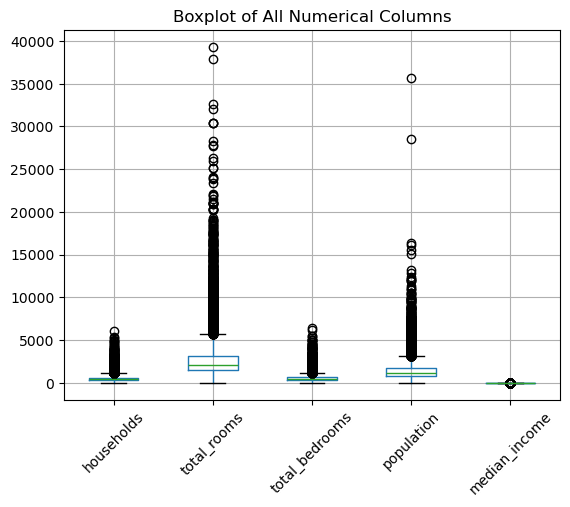

In [52]:
#Visualisation of outliers
import matplotlib.pyplot as plt

out_col=['households','total_rooms','total_bedrooms','population','median_income']
X[out_col].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of All Numerical Columns")
plt.show()

In [53]:
#Capping the outliers:
for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    X[col] = X[col].clip(lower=lower, upper=upper)


In [54]:
#Verifying
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
Q1 = X[num_cols].quantile(0.25)
Q3 = X[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_after = ((X[num_cols] < (Q1 - 1.5 * IQR)) |
            (X[num_cols] > (Q3 + 1.5 * IQR))).sum()

print("Outliers after:")
print(outliers_after)

Outliers after:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


Outlier handling was performed using the Interquartile Range (IQR) method on numerical features only. To avoid data loss, outliers were treated using column-wise capping (winsorization). This approach limits extreme values while preserving all observations and improves the robustness of regression models

**10. Skewness Handling** 
---

In [55]:
X[num_cols].skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           0.844657
total_bedrooms        0.849476
population            0.842247
households            0.844984
median_income         0.735618
dtype: float64

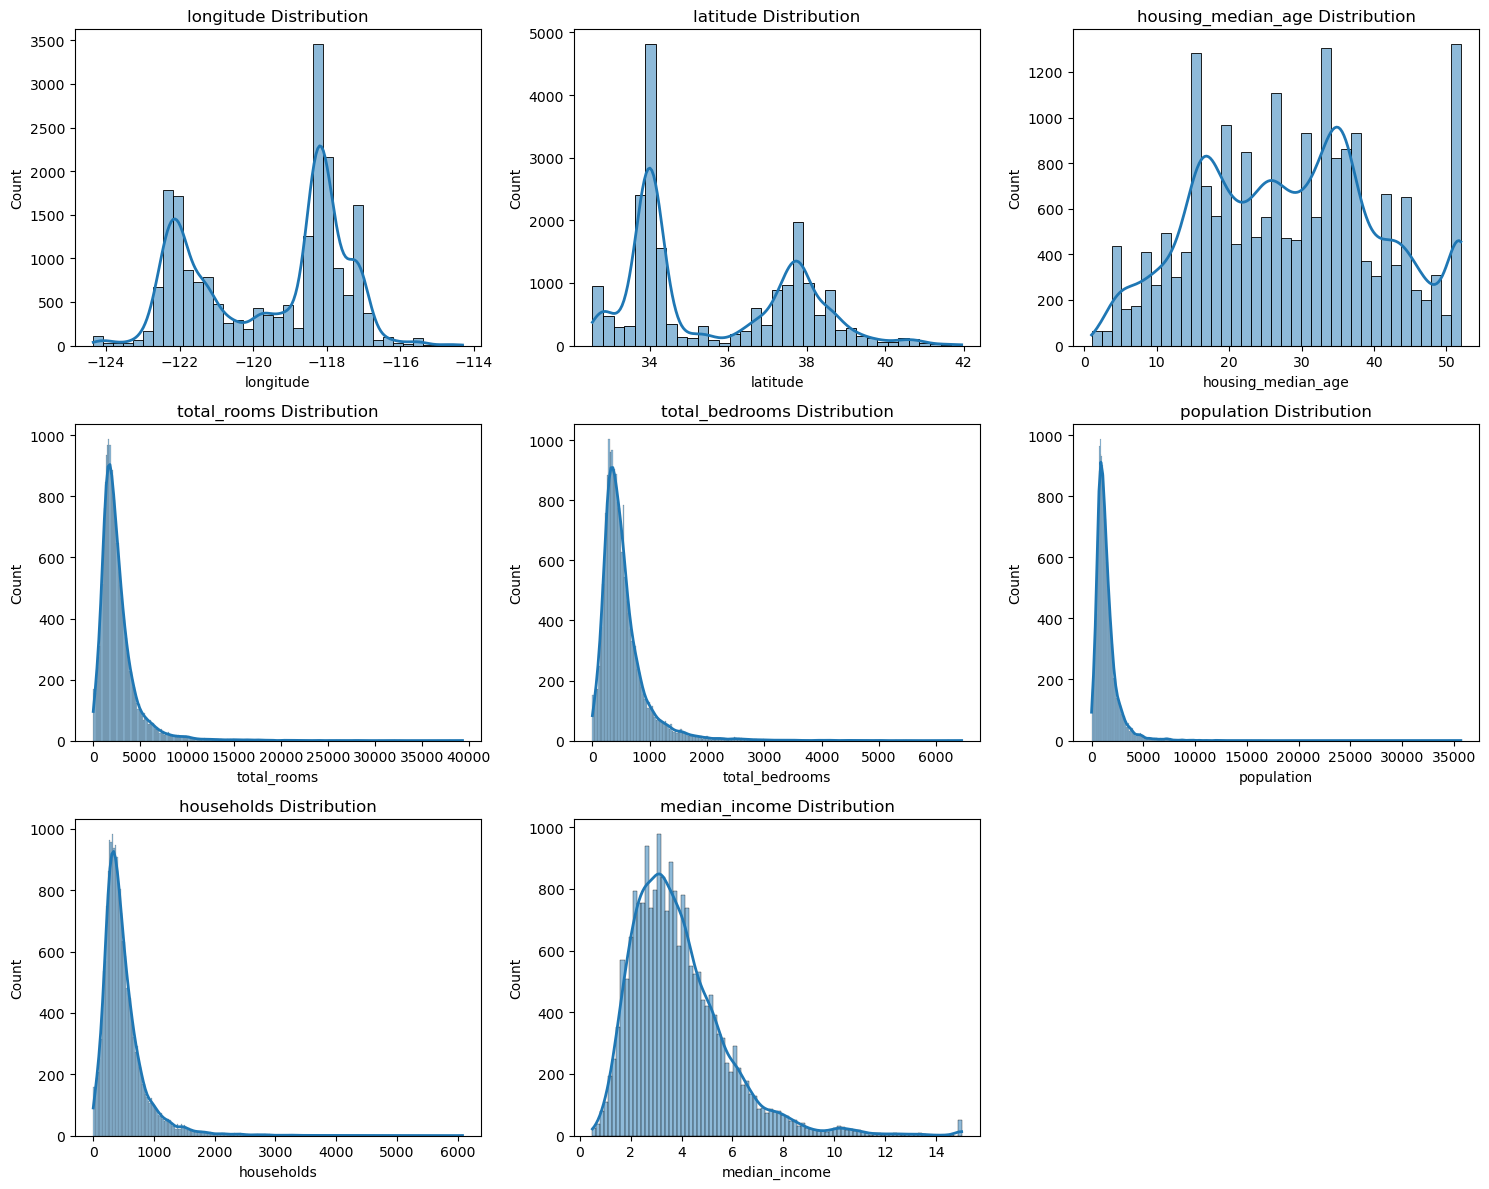

In [56]:
# Visualizing skewness using hitograms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns (exclude target)
num_cols = X.select_dtypes(include='number').columns

# Set up the plot grid
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(num_cols) / n_cols))
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, line_kws={'linewidth':2})
    plt.title(f'{col} Distribution')
    
plt.tight_layout()
plt.show()


In [57]:
#Applying Square root transformation
right_skewed_cols = ['total_rooms', 'total_bedrooms', 'population', 'households','median_income']
X[right_skewed_cols] = np.sqrt(X[right_skewed_cols])
#Verifying
X[num_cols].skew()


longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           0.103541
total_bedrooms        0.126594
population            0.111925
households            0.101796
median_income         0.237935
dtype: float64

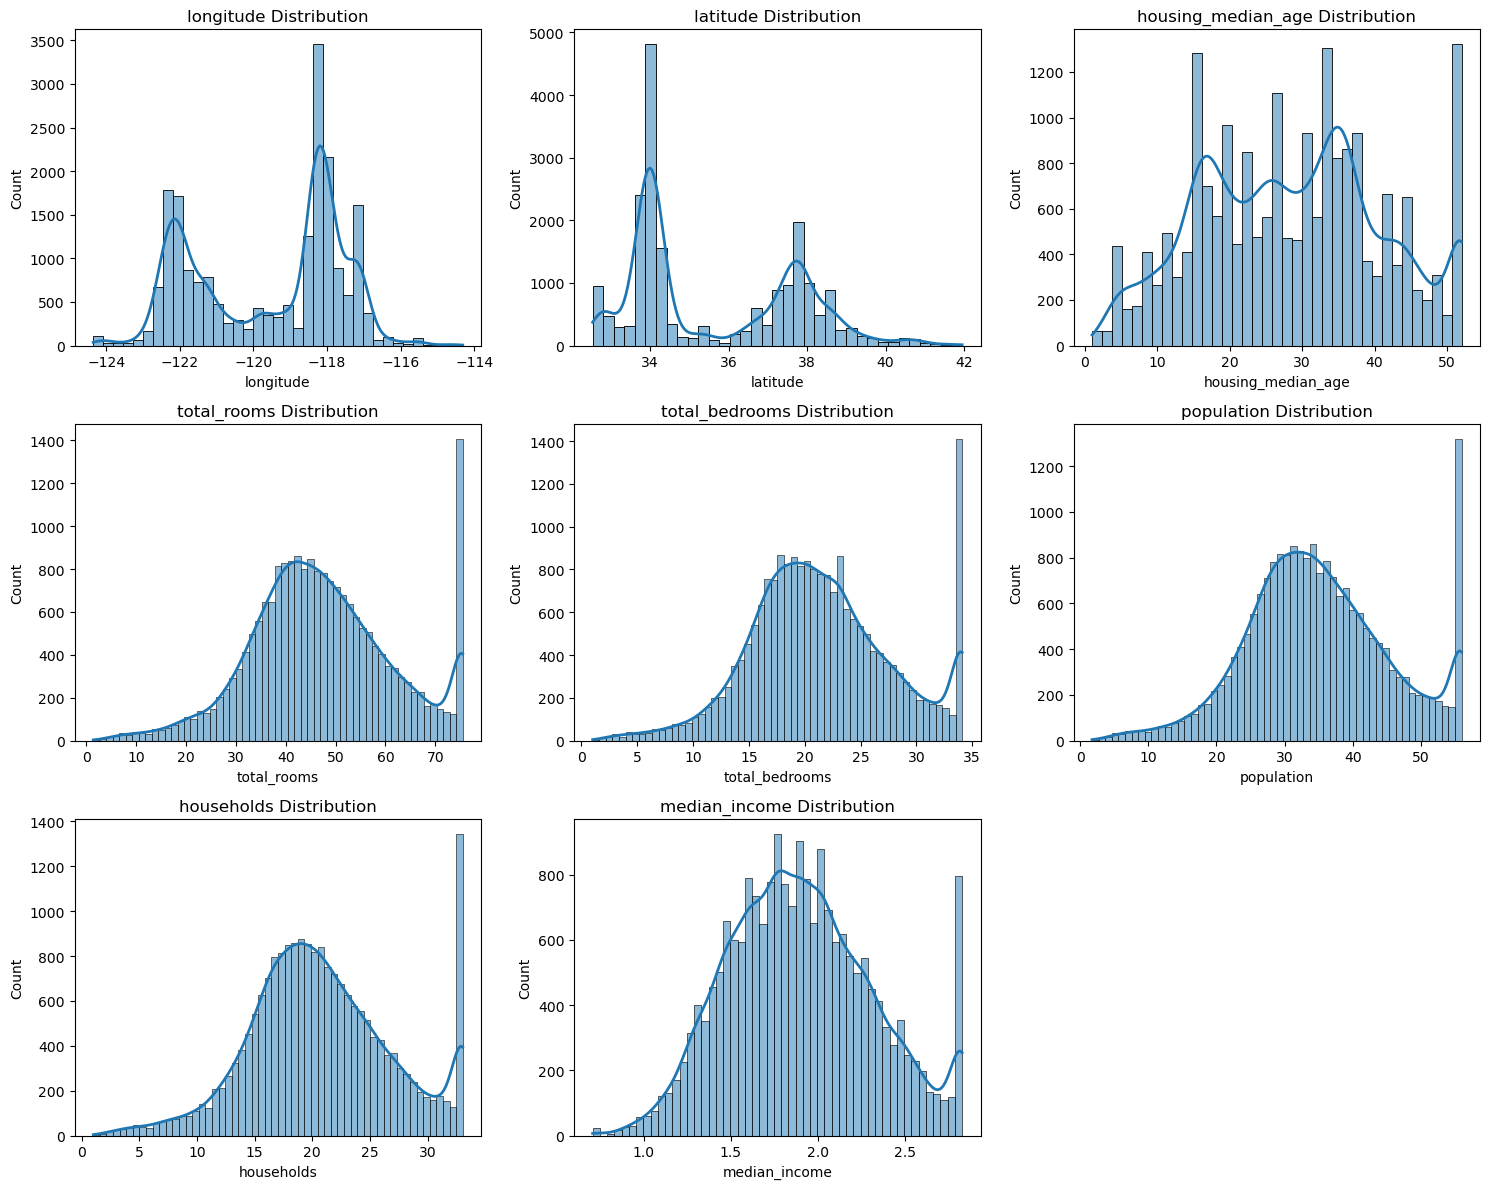

In [59]:
#Visualising again
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
num_cols = X.select_dtypes(include='number').columns

# Set up the plot grid
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(num_cols) / n_cols))
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X[col], kde=True, line_kws={'linewidth':2})
    plt.title(f'{col} Distribution')
    
plt.tight_layout()
plt.show()


Some numerical features in the California Housing dataset, such as Population, AveRooms, and AveOccup, are right-skewed. High skewness can negatively affect models like Linear Regression and SVR, which assume more symmetric feature distributions. To reduce skewness and the impact of extreme values, a square root transformation was applied. This results in more balanced feature distributions and improved model performance.

**11. Splitting dataset (Training and testing)**
---

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**12.Feature Scaling**
---
StandardScaler applied because algorithms like Linear Regression & SVR are sensitive to feature scale

In [61]:
#Applying Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **REGRESSION**

**1. LINEAR REGRESSION**
---

In [63]:
#linear regression
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

y_pred_lr = lr.predict(X_test_scaled)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('Linear Regression performance')
print('-'*30)
print('r2:',r2_score(y_test,y_pred_lr)) #explained variance
print('mae:',mean_absolute_error(y_test,y_pred_lr)) #avg error
print('mse:',mean_squared_error(y_test,y_pred_lr)) # sqrd error



Linear Regression performance
------------------------------
r2: 0.6031583863801114
mae: 53648.57265587028
mse: 5200248134.271081


Linear Regression achieved an R² score of approximately 0.60, indicating that about 60% of the variance in median house prices is explained by the model. The MAE of around 53,000 suggests a reasonable average prediction error for housing price data. While Linear Regression provides a strong baseline, its performance is limited due to the presence of non-linear relationships in the dataset.




In [66]:
# Decision Tree Regressor:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

In [65]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

In [67]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)

In [68]:
#SVR
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)